In [1]:
%pip install torchvision

In [2]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt



In [24]:
data_dir = r"C:\MS Project\tomato_data\tomato_data"

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(r"C:\MS Project\tomato_data\tomato_data\train", transform=train_transforms)
test_data = datasets.ImageFolder(r"C:\MS Project\tomato_data\tomato_data\test", transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [25]:
trainloader

In [18]:
for images, labels in trainloader:
    print(labels)

tensor([0, 3, 4, 2, 2, 0, 5, 4, 3, 4, 1, 4, 0, 3, 2, 4, 2, 1, 2, 1, 4, 3, 2, 0,
        2, 4, 1, 0, 2, 2, 2, 4, 3, 4, 4, 3, 4, 1, 3, 4, 4, 4, 2, 4, 3, 3, 4, 1,
        5, 3, 0, 4, 1, 5, 4, 3, 0, 4, 4, 4, 1, 4, 2, 4])
tensor([0, 4, 2, 1, 5, 0, 1, 1, 4, 4, 4, 0, 4, 4, 4, 2, 3, 0, 4, 0, 2, 4, 4, 4,
        4, 2, 2, 3, 2, 4, 3, 2, 4, 3, 2, 1, 0, 4, 0, 2, 3, 4, 4, 4, 2, 4, 4, 3,
        4, 0, 5, 1, 1, 4, 0, 4, 4, 4, 4, 2, 4, 4, 0, 4])
tensor([4, 2, 2, 4, 4, 3, 0, 3, 1, 0, 4, 4, 4, 0, 4, 2, 3, 4, 4, 3, 3, 4, 4, 4,
        4, 0, 1, 4, 3, 2, 1, 4, 4, 2, 0, 4, 0, 4, 3, 3, 4, 3, 2, 4, 4, 4, 2, 1,
        4, 4, 4, 2, 0, 1, 0, 4, 0, 4, 4, 0, 2, 4, 1, 0])
tensor([2, 4, 0, 3, 0, 4, 3, 4, 0, 4, 4, 1, 4, 1, 0, 0, 3, 0, 0, 4, 2, 4, 0, 4,
        3, 1, 2, 4, 4, 3, 2, 3, 4, 3, 4, 4, 3, 2, 1, 4, 4, 2, 0, 0, 4, 0, 4, 1,
        2, 4, 0, 4, 4, 4, 4, 4, 0, 3, 0, 4, 0, 4, 2, 4])
tensor([3, 1, 4, 2, 1, 0, 4, 2, 4, 2, 3, 0, 3, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 2,
        4, 2, 2, 4, 0, 4, 0, 4, 1, 0, 4, 4, 4, 0, 0,

In [26]:
trainloader.dataset.classes

['bacterial_spots',
 'early_blight',
 'healthy',
 'septoria_leaf_spot',
 'tomato_Yellow_Leaf_Curl_Virus',
 'tomato_mosaic_virus']

In [20]:
model = models.resnet50(pretrained=True)
# model = models.densenet121(pretrained=True)
model

c:\Users\preve\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\preve\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
for params in model.parameters():
    params.requires_grad = False

classifier  = nn.Sequential(nn.Linear(2048,1024),
                           nn.ReLU(),
                           nn.Dropout(0.2),                       #80 % neuron gets activated to avoid overfitting
                           nn.Linear(1024,512),
                           nn.ReLU(),                              #activation layer
                           nn.Dropout(0.2),
                           nn.Linear(512,256),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(256,128),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(128,6),
                           nn.LogSoftmax(dim = 1))             #classification layer imp
model.fc = classifier

In [22]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [23]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(),lr = 0.001)                                 #optimizer for minimising loss and lr is learning rate
model.to('cpu')                                                                                           #makes sure ur model achieves max accuracy with minimum epocs

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
import time
device = 'cpu'

In [12]:
epoch = 2
train_lossesAD, test_lossesAD = [], []
for e in range(epoch):                                                  #for loop for no. of epoc
    running_loss = 0
    for images, labels in trainloader:
#         print("here")
#         images = images.view(images.shape[0], -1)                        
        start = time.time()
        images, labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        output = model.forward(images)                                     
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()                                         
    else:
#         print("here2")
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
#                 images = images.view(images.shape[0], -1)
                images, labels = images.to(device),labels.to(device)
                pred = model.forward(images)
                test_loss += criterion(pred,labels)
        
        
                ps = torch.exp(pred)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()       
        train_lossesAD.append(running_loss/len(trainloader))
        test_lossesAD.append(test_loss/len(testloader))        
        print("Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              f"Time per batch: {(time.time() - start)/3:.3f} seconds"
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
plt.plot(train_lossesAD, label='Training loss')
plt.plot(test_lossesAD, label='Validation loss')
plt.legend(frameon=False)

print("Model's state_dict:")
for param_tensor in model.state_dict():
   print(param_tensor, "\t", model.state_dict()[param_tensor].size())

PATH = r"C:\MS Project\XAI model"
torch.save(model, PATH)

Training Loss: 0.741..  Test Loss: 0.435..  Time per batch: 24.944 secondsTest Accuracy: 0.832
Training Loss: 0.452..  Test Loss: 0.266..  Time per batch: 25.177 secondsTest Accuracy: 0.918
Training Loss: 0.340..  Test Loss: 0.190..  Time per batch: 25.111 secondsTest Accuracy: 0.937
Model's state_dict:
conv1.weight 	 torch.Size([64, 3, 7, 7])
bn1.weight 	 torch.Size([64])
bn1.bias 	 torch.Size([64])
bn1.running_mean 	 torch.Size([64])
bn1.running_var 	 torch.Size([64])
bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv1.weight 	 torch.Size([64, 64, 1, 1])
layer1.0.bn1.weight 	 torch.Size([64])
layer1.0.bn1.bias 	 torch.Size([64])
layer1.0.bn1.running_mean 	 torch.Size([64])
layer1.0.bn1.running_var 	 torch.Size([64])
layer1.0.bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv2.weight 	 torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight 	 torch.Size([64])
layer1.0.bn2.bias 	 torch.Size([64])
layer1.0.bn2.running_mean 	 torch.Size([64])
layer1.0.bn2.running_var 	 torch.Size([64])
la

RuntimeError: File C:\MS Project\XAI model cannot be opened.

: 

In [40]:
model= torch.load(r"C:\MS Project\XAI model\90percentResnet")

model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [33]:
from PIL import Image
from pathlib import Path
import numpy as np
from torch.autograd import Variable
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import webbrowser

In [32]:
import re

In [35]:
# classes = trainloader.dataset.classes
classes= ['bacterial_spots', 'early_blight', 'healthy', 'septoria_leaf_spot', 'tomato_Yellow_Leaf_Curl_Virus', 'tomato_mosaic_virus']

print(classes)

['bacterial_spots', 'early_blight', 'healthy', 'septoria_leaf_spot', 'tomato_Yellow_Leaf_Curl_Virus', 'tomato_mosaic_virus']


In [58]:
test_image_path = r"C:\MS Project\yellow_curl_virus.JPG"
im = Image.open(test_image_path)
tens = test_transforms(im)
tens = tens.unsqueeze(0)
inp = Variable(tens)
inp = inp.to("cpu")
pred = model(inp)
print(pred)

tensor([[-1.2596e+01, -1.5730e+01, -1.9255e+01, -1.7810e+01, -3.5763e-06,
         -1.9108e+01]], grad_fn=<LogSoftmaxBackward0>)


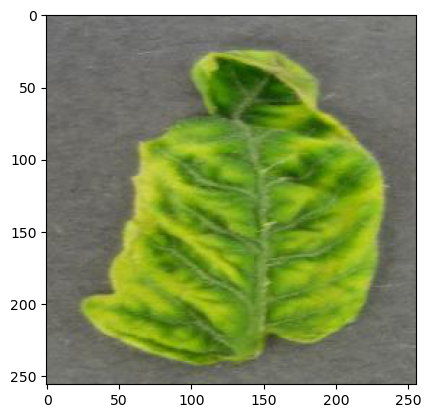

The leaf is diseased
Disease is tomato_Yellow_Leaf_Curl_Virus


In [59]:
index = pred.data.cpu().numpy().argmax()
img=mpimg.imread(test_image_path)
imgplot = plt.imshow(img)
plt.show()
if index == 2:
    print("The leaf is Healthy")
else:
    print("The leaf is diseased")
    print("Disease is {}".format(classes[index]))
    dis = classes[index]
    dis = re.sub('tomato_',  '',    dis)
    dis = re.sub('_',  '-',    dis)
    webbrowser.open("https://gardenerspath.com/how-to/disease-and-pests/common-tomato-diseases/"+dis)
# print("Predicted image is {}".format(classes[index]))

In [62]:
def test_label_predictions(model, device, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = test_label_predictions(model, 'cpu', testloader)
print('Confusion matrix:')
print(confusion_matrix(actuals, predictions))
print('F1 score: %f' % f1_score(actuals, predictions, average='micro'))
print('Accuracy score: %f' % accuracy_score(actuals, predictions))

Confusion matrix:
[[ 355   41    4   12   15    0]
 [   0  165   16    7    9    3]
 [   0    0  321    0    0    0]
 [   6   23   29  274    5   14]
 [   2    0   10    0 1055    0]
 [   0    0    3    0    6   74]]
F1 score: 0.916292
Accuracy score: 0.916292


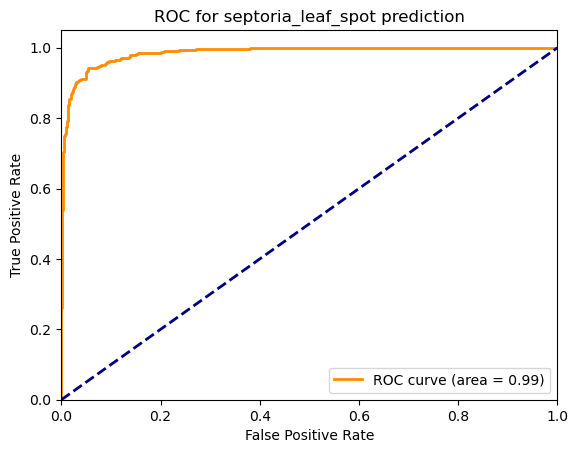

In [63]:
def test_class_probabilities(model, device, test_loader, which_class):
    model.eval()
    actuals = []
    probabilities = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            output = output.to('cpu')
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction) == which_class)
            probabilities.extend(np.exp(output[:, which_class]))
    return [i.item() for i in actuals], [i.item() for i in probabilities]

which_class = 3
actuals, class_probabilities = test_class_probabilities(model, 'cpu', testloader, which_class)

fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for {} prediction'.format(classes[which_class]))
plt.legend(loc="lower right")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


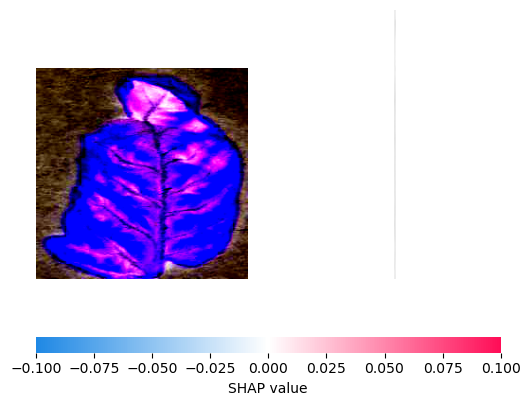

In [12]:

import torch
from torchvision import models, transforms
import matplotlib.pyplot as plt
import numpy as np
import shap
from PIL import Image

# Load a pre-trained ResNet model
model_path = r"C:\MS Project\XAI model\90percentResnet"
model = torch.load(model_path)
model.eval()

# Preprocess the image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)

# Load and preprocess an example image
image_path = r"C:\MS Project\yellow_curl_virus.JPG"
input_tensor = preprocess_image(image_path)

# Use SHAP to explain the model's predictions
explainer = shap.GradientExplainer(model, input_tensor)
shap_values, indexes = explainer.shap_values(input_tensor, ranked_outputs=1)

# Convert SHAP values to numpy for visualization
shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
image_numpy = np.swapaxes(np.swapaxes(input_tensor.numpy(), 1, -1), 1, 2)

# Visualize the explanation for the top prediction
shap.image_plot(shap_numpy, -image_numpy)




In [13]:
model2 = models.alexnet(pretrained=True)
model2

c:\Users\preve\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\preve\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\preve/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:06<00:00, 38.0MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [15]:
for param in model2.features.parameters():
    param.requires_grad = False

In [19]:
custom_classifier = nn.Sequential(
    nn.Linear(9216, 1024),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 6),
    nn.LogSoftmax(dim=1)
)

# Replace the classifier in AlexNet
model2.classifier = custom_classifier

In [20]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model2.classifier.parameters(),lr = 0.001)
model2.to('cpu')

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, 

Training Loss: 0.541..  Test Loss: 0.205..  Time per batch: 3.955 secondsTest Accuracy: 0.918
Training Loss: 0.276..  Test Loss: 0.114..  Time per batch: 3.743 secondsTest Accuracy: 0.968
Model's state_dict:
conv1.weight 	 torch.Size([64, 3, 7, 7])
bn1.weight 	 torch.Size([64])
bn1.bias 	 torch.Size([64])
bn1.running_mean 	 torch.Size([64])
bn1.running_var 	 torch.Size([64])
bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv1.weight 	 torch.Size([64, 64, 1, 1])
layer1.0.bn1.weight 	 torch.Size([64])
layer1.0.bn1.bias 	 torch.Size([64])
layer1.0.bn1.running_mean 	 torch.Size([64])
layer1.0.bn1.running_var 	 torch.Size([64])
layer1.0.bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv2.weight 	 torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight 	 torch.Size([64])
layer1.0.bn2.bias 	 torch.Size([64])
layer1.0.bn2.running_mean 	 torch.Size([64])
layer1.0.bn2.running_var 	 torch.Size([64])
layer1.0.bn2.num_batches_tracked 	 torch.Size([])
layer1.0.conv3.weight 	 torch.Size([256, 64, 1, 1

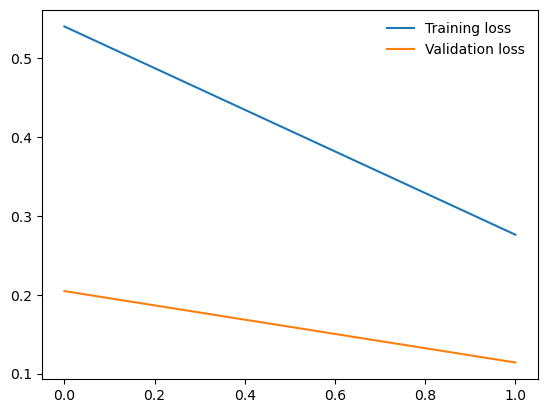

In [27]:
epoch = 2
train_lossesAD, test_lossesAD = [], []
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
#         print("here")
#         images = images.view(images.shape[0], -1)
        start = time.time()
        images, labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        output = model2.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
#         print("here2")
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model2.eval()
            for images, labels in testloader:
#                 images = images.view(images.shape[0], -1)
                images, labels = images.to(device),labels.to(device)
                pred = model2.forward(images)
                test_loss += criterion(pred,labels)
        
        
                ps = torch.exp(pred)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model2.train()       
        train_lossesAD.append(running_loss/len(trainloader))
        test_lossesAD.append(test_loss/len(testloader))        
        print("Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              f"Time per batch: {(time.time() - start)/3:.3f} seconds"
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
plt.plot(train_lossesAD, label='Training loss')
plt.plot(test_lossesAD, label='Validation loss')
plt.legend(frameon=False)

print("Model's state_dict:")
for param_tensor in model.state_dict():
   print(param_tensor, "\t", model2.state_dict()[param_tensor].size())



In [28]:
PATH = r"C:\MS Project\XAI model\90alexnet"
torch.save(model2, PATH)

In [29]:
model2.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, 

In [30]:
#testing

test_image_path = r"C:\MS Project\yellow_curl_virus.JPG"
im = Image.open(test_image_path)
tens = test_transforms(im)
tens = tens.unsqueeze(0)
inp = Variable(tens)
inp = inp.to("cpu")
pred = model2(inp)
print(pred)

tensor([[-1.4972e+01, -2.0655e+01, -2.4851e+01, -2.3684e+01, -3.5763e-07,
         -2.3504e+01]], grad_fn=<LogSoftmaxBackward0>)


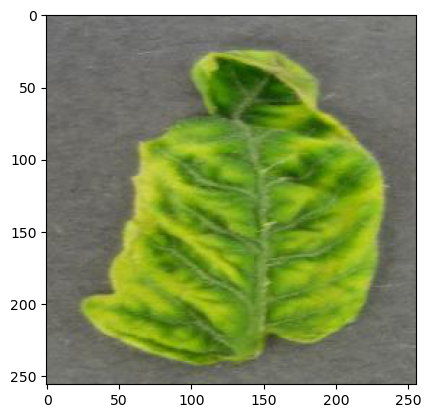

The leaf is diseased
Disease is tomato_Yellow_Leaf_Curl_Virus


In [36]:
index = pred.data.cpu().numpy().argmax()
img=mpimg.imread(test_image_path)
imgplot = plt.imshow(img)
plt.show()
if index == 2:
    print("The leaf is Healthy")
else:
    print("The leaf is diseased")
    print("Disease is {}".format(classes[index]))
    dis = classes[index]
    dis = re.sub('tomato_',  '',    dis)
    dis = re.sub('_',  '-',    dis)
    webbrowser.open("https://gardenerspath.com/how-to/disease-and-pests/common-tomato-diseases/"+dis)
# print("Predicted image is {}".format(classes[index]))

In [37]:
def test_label_predictions(model, device, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = test_label_predictions(model2, 'cpu', testloader)
print('Confusion matrix:')
print(confusion_matrix(actuals, predictions))
print('F1 score: %f' % f1_score(actuals, predictions, average='micro'))
print('Accuracy score: %f' % accuracy_score(actuals, predictions))

Confusion matrix:
[[ 402   13    0   12    0    0]
 [   6  160    2   30    1    1]
 [   0    0  321    0    0    0]
 [   1    0    0  345    0    5]
 [   2    1    0    0 1063    1]
 [   0    0    0    6    0   77]]
F1 score: 0.966925
Accuracy score: 0.966925


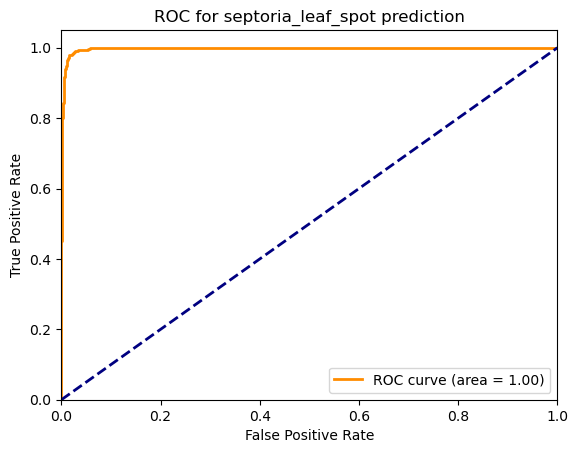

In [38]:
def test_class_probabilities(model, device, test_loader, which_class):
    model.eval()
    actuals = []
    probabilities = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            output = output.to('cpu')
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction) == which_class)
            probabilities.extend(np.exp(output[:, which_class]))
    return [i.item() for i in actuals], [i.item() for i in probabilities]

which_class = 3
actuals, class_probabilities = test_class_probabilities(model2, 'cpu', testloader, which_class)

fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for {} prediction'.format(classes[which_class]))
plt.legend(loc="lower right")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


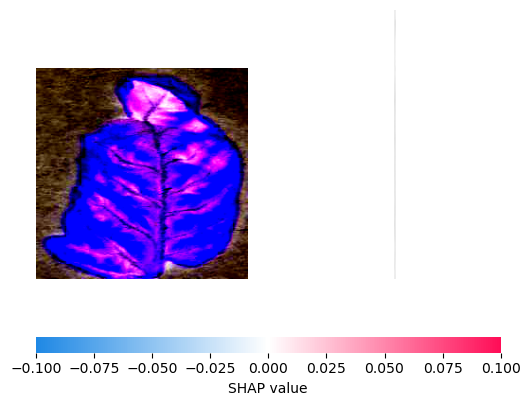

In [39]:
import torch
from torchvision import models, transforms
import matplotlib.pyplot as plt
import numpy as np
import shap
from PIL import Image

# Load a pre-trained ResNet model
model_path = r"C:\MS Project\XAI model\90alexnet"
model = torch.load(model_path)
model.eval()

# Preprocess the image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)

# Load and preprocess an example image
image_path = r"C:\MS Project\yellow_curl_virus.JPG"
input_tensor = preprocess_image(image_path)

# Use SHAP to explain the model's predictions
explainer = shap.GradientExplainer(model, input_tensor)
shap_values, indexes = explainer.shap_values(input_tensor, ranked_outputs=1)

# Convert SHAP values to numpy for visualization
shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
image_numpy = np.swapaxes(np.swapaxes(input_tensor.numpy(), 1, -1), 1, 2)

# Visualize the explanation for the top prediction
shap.image_plot(shap_numpy, -image_numpy)